In [3]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import string
import os
from PIL import Image
import glob

In [2]:
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

filename = "/Users/anwariqbal/Desktop/data/text/Desc.txt"
doc = load_doc(filename)
print(doc[:500])

20190823_153601 view of auckland war museum from the side
20190823_153601 auckland war museum with green grass in the front and flags flying
20190823_153601 distant view of auckland war museum with grass and trees in the front
20190823_153601 auckland war museum on a sunny day with flags flying on the top
20190823_153601 auckland war museum under blue sky and green grass in the front
20190823_162505 boy standing in front of auckland war museum
20190823_162505 boy looking on the side in front of 


In [3]:
def load_descriptions(doc):
    mapping = dict()
    # process lines
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        if len(line) < 2:
            continue
        # take the first token as the image id, the rest as the description
        image_id, image_desc = tokens[0], tokens[1:]
        # extract filename from image id
        image_id = image_id.split('.')[0]
        # convert description tokens back to string
        image_desc = ' '.join(image_desc)
        # create the list if needed
        if image_id not in mapping:
            mapping[image_id] = list()
        # store description
        mapping[image_id].append(image_desc)
    return mapping

# parse descriptions
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))

Loaded: 100 


In [4]:
list(descriptions.keys())[:6]

['20190823_153601',
 '20190823_162505',
 '20190823_162545',
 '20190823_162639',
 '20190823_162721',
 '20190823_162808']

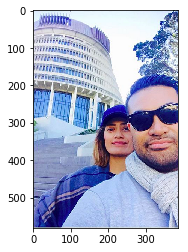

In [11]:
x=plt.imread('/Users/anwariqbal/Desktop/data/images/20190910_060329.jpg')
plt.imshow(x)
plt.show()

In [13]:
descriptions['20190910_060329']

['a man and a woman taking selfie outside beehive building',
 'a man and a woman taking selfie in front of beehive building',
 'a man with shades and woman with a hat taking selfie outside beehive building',
 'two people taking selfie outside beehive building',
 'two people smiling outside beehive building']

In [17]:
def clean_descriptions(descriptions):
    # prepare translation table for removing punctuation
    table = str.maketrans('', '', string.punctuation)
    for key, desc_list in descriptions.items():
        for i in range(len(desc_list)):
            desc = desc_list[i]
            # tokenize
            desc = desc.split()
            # convert to lower case
            desc = [word.lower() for word in desc]
            # remove punctuation from each token
            desc = [w.translate(table) for w in desc]
            # remove hanging 's' and 'a'
            desc = [word for word in desc if len(word)>1]
            # remove tokens with numbers in them
            desc = [word for word in desc if word.isalpha()]
            # store as string
            desc_list[i] =  ' '.join(desc)

# clean descriptions
clean_descriptions(descriptions)

In [18]:
descriptions['20190823_162505']

['boy standing in front of auckland war museum',
 'boy looking on the side in front of auckland war museum',
 'boy in tshirt and jeans standing outside auckland war museum and looking on one side',
 'boy standing outside auckland war museum',
 'boy at auckland war museum under blue sky']

In [19]:
descriptions['20190823_162808']

['man in blue torn jeans standing in front of auckland war museum',
 'man posing for photo in front of auckland war museum',
 'man standing in blue jeans in front of auckland war museum',
 'man in front of auckland war museum wearing black shirt and blue jeans',
 'man getting himself clicked at auckland war museum']

In [20]:
# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
    # build a list of all description strings
    all_desc = set()
    for key in descriptions.keys():
        [all_desc.update(d.split()) for d in descriptions[key]]
    return all_desc

# summarize vocabulary
vocabulary = to_vocabulary(descriptions)
print('Original Vocabulary Size: %d' % len(vocabulary))

Original Vocabulary Size: 326


In [21]:
# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
    lines = list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(key + ' ' + desc)
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

save_descriptions(descriptions, '/Users/anwariqbal/Desktop/data/text/descriptions.txt')